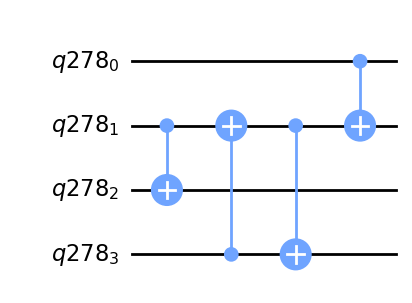

In [153]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

# load a dummy circuit
# generate network of random cnots
n, M = 2, 4
N = n**2
register = QuantumRegister(N)
qc = QuantumCircuit(register)

for _ in range(M):
    qc.cx(*np.random.choice(N, 2, replace=False))
qc.name = "random cx circuit"
qc.decompose().draw("mpl")

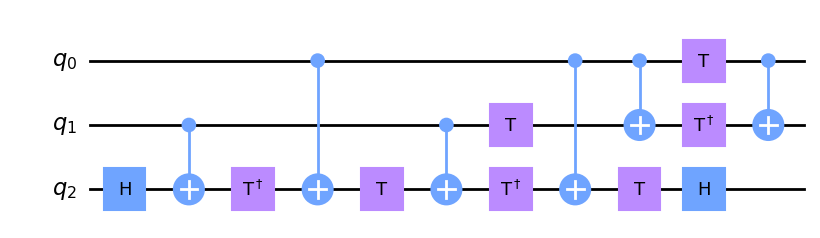

In [154]:
from qiskit.transpiler.coupling import CouplingMap
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
coupling = CouplingMap.from_line(3)
qc.decompose().draw("mpl")

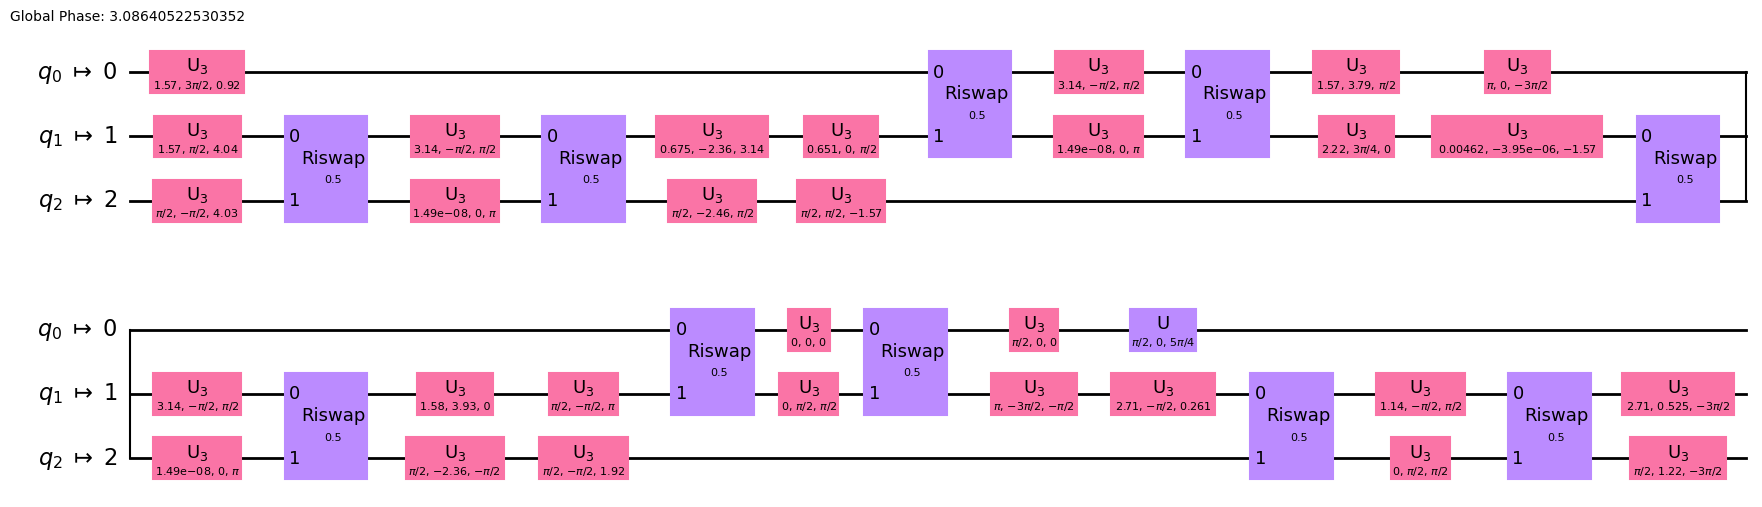

In [158]:
from virtual_swap.pass_managers import BruteCNS
brute = BruteCNS(coupling)
transp = brute.run(qc)
transp.draw("mpl")

In [156]:
from qiskit.transpiler.passes import OptimizeSwapBeforeMeasure, Unroller
from qiskit.converters import dag_to_circuit
from qiskit.transpiler import PassManager

clean = PassManager()
clean.append(OptimizeSwapBeforeMeasure())
clean.append(Unroller(["u", "cx", "iswap", "swap"]))

property_set = brute.pm.property_set  # Reference for brevity
dags, costs, perms = property_set["all_dags"], property_set["all_costs"], property_set["all_perms"]

for dag, cost, perm in zip(dags, costs, perms):
    print(cost)
    perm_str = ", ".join([f"{node.name}[{node.qargs[0].index},{node.qargs[1].index}]" for node in perm])
    print("Permutation:", perm_str)
    circuit = dag_to_circuit(dag)
    print(clean.run(circuit).draw(fold=-1))


10
Permutation: cx[1,2]
global phase: π/2
      ┌────────────┐┌────────────┐┌─────────────┐┌────────┐                                                      ┌────────────┐                         ┌───┐┌─────────────┐┌───┐
q_0: ─┤ U(π/2,0,π) ├┤ U(π/2,0,π) ├┤ U(0,0,-π/2) ├┤1       ├──────────────────────────────────────────────────■───┤ U(0,0,π/4) ├─────────────────────────┤ X ├┤ U(0,0,-π/4) ├┤ X ├
     ┌┴────────────┤└────────────┘└─────────────┘│  Iswap │┌────────────┐┌─────────────┐┌───┐┌────────────┐┌─┴─┐┌┴────────────┤┌───┐┌───────────────┐   └─┬─┘└┬────────────┤└─┬─┘
q_1: ┤ U(0,0,-π/2) ├─────────────────────────────┤0       ├┤ U(π/2,0,π) ├┤ U(0,0,-π/4) ├┤ X ├┤ U(0,0,π/4) ├┤ X ├┤ U(0,0,-π/4) ├┤ X ├┤ U(π/2,0,5π/4) ├─X───■───┤ U(0,0,π/4) ├──■──
     └─────────────┘                             └────────┘└────────────┘└─────────────┘└─┬─┘└────────────┘└───┘└─────────────┘└─┬─┘└───────────────┘ │       └────────────┘     
q_2: ───────────────────────────────────────────────────────────────

/tmp/ipykernel_5156/1982246052.py:14: DeprecationWarning: 'Bit.index' is deprecated since Qiskit Terra 0.17 and will be removed in a future release. Bits may be in more than one register. Use 'QuantumCircuit.find_bit' to find all the containing registers within a circuit, and the index of the bit within the circuit.
  perm_str = ", ".join([f"{node.name}[{node.qargs[0].index},{node.qargs[1].index}]" for node in perm])


global phase: π
                                                                                                                                                                                         ┌───┐     ┌─────────────┐┌───┐
q_0: ──────────────────────────────────────────────────────────────────────────────────────■────────────────────────────────────────────────────────────────────────────X────────────────┤ X ├─────┤ U(0,0,-π/4) ├┤ X ├
     ┌─────────────┐                             ┌────────┐ ┌────────────┐┌─────────────┐┌─┴─┐┌────────────┐┌────────────┐┌─────────────┐┌────────┐┌────────────┐       │                └─┬─┘     └┬────────────┤└─┬─┘
q_1: ┤ U(0,0,-π/2) ├─────────────────────────────┤0       ├─┤ U(π/2,0,π) ├┤ U(0,0,-π/4) ├┤ X ├┤ U(0,0,π/4) ├┤ U(π/2,0,π) ├┤ U(0,0,-π/2) ├┤1       ├┤ U(0,0,π/4) ├───────X─────────■────────■────────┤ U(0,0,π/4) ├──■──
     └┬────────────┤┌────────────┐┌─────────────┐│  Iswap │┌┴────────────┤└─────────────┘└───┘└────────────┘└───────────